In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
df = pd.read_csv(r'C:\Users\M RAJESH\Desktop\Ekeeda DS\Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

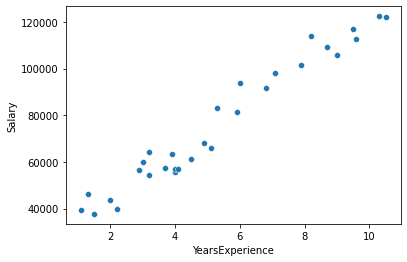

In [4]:
sns.scatterplot(df['YearsExperience'],df['Salary'])

In [5]:
x=df.drop('Salary',axis=1) 

In [6]:
y=df.Salary

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
X_train.head()

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9


In [9]:
y_train.head()

27    112635.0
11     55794.0
17     83088.0
22    101302.0
5      56642.0
Name: Salary, dtype: float64

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_test  = scaler.fit_transform(X_test)

In [13]:
X_train

array([[ 1.75832984],
       [-0.40973925],
       [ 0.09356251],
       [ 1.10016601],
       [-0.83560996],
       [ 0.01613147],
       [-0.7194634 ],
       [-0.21616165],
       [ 1.21631257],
       [ 0.6742953 ],
       [-1.45505827],
       [ 2.10676952],
       [-0.79689444],
       [-1.1066186 ],
       [ 0.32585562],
       [ 0.36457114],
       [-0.52588581],
       [-0.7194634 ],
       [ 1.52603672],
       [-1.18404964],
       [-1.53248931],
       [ 0.79044186],
       [-0.06129957],
       [-0.40973925]])

In [14]:
X_test

array([[-1.46136985],
       [ 1.19933112],
       [-0.67525365],
       [-0.73572413],
       [ 0.95744921],
       [ 0.7155673 ]])

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [16]:
reg.fit(X_train,y_train)

LinearRegression()

In [17]:
print(reg.predict(X_test))

[ 38734.62911271 102734.74576267  57643.75448656  56189.20638088
  96916.55333995  91098.36091723]


In [18]:
reg.coef_

array([24053.85556857])

In [19]:
reg.intercept_

73886.20833333333

In [20]:
y_pred = reg.predict(X_test)

In [21]:
y_pred

array([ 38734.62911271, 102734.74576267,  57643.75448656,  56189.20638088,
        96916.55333995,  91098.36091723])

<AxesSubplot:xlabel='Salary'>

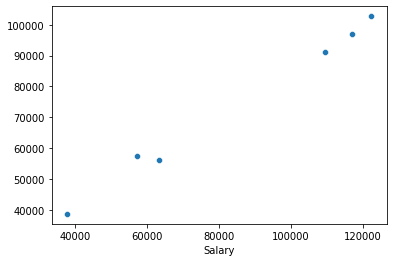

In [22]:
sns.scatterplot(y_test,y_pred)

In [23]:
residuals = y_test-y_pred

In [24]:
residuals

2     -1003.629113
28    19656.254237
13     -562.754487
10     7028.793619
26    20052.446660
24    18332.639083
Name: Salary, dtype: float64

<AxesSubplot:xlabel='Salary', ylabel='Density'>

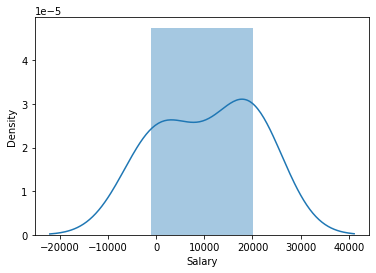

In [25]:
sns.distplot(residuals,kde=True)

<AxesSubplot:ylabel='Salary'>

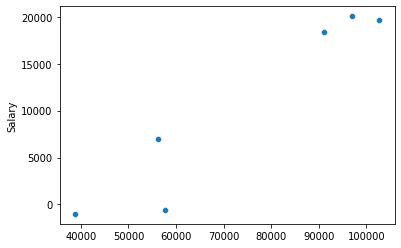

In [26]:
sns.scatterplot(y_pred,residuals)

R square and adjusted R square
Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [27]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [28]:
score

0.819286774172362

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [29]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7741084677154524

New Data Prediction

In [51]:
k = df.YearsExperience[0].reshape(1,-1)

In [52]:
k

array([[1.1]])

In [53]:
scaler.transform(k) 

array([[-1.5823108]])

In [54]:
reg.predict(scaler.transform(k)) 

array([35825.53290135])